<a href="https://colab.research.google.com/github/ajmauney/movie_analysis/blob/main/Dimick_Mauney_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get update
!apt install chromium-chromedriver
!pip install selenium
from textblob import TextBlob
import nltk
nltk.download('punkt')
import requests
import html5lib
import bs4
import pandas as pd
from bs4 import BeautifulSoup
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:14 http://archive.ubuntu.com/ubuntu b

#Project Report 1
Today we wrote a class to perform sentiment analysis on the text that we give it and also started to figure out the web scraping.  All we have to do left is finish web scraping then train and fit our model in order to predict reviews.

In [ ]:
class Movie_Review:
    def __init__(self, text):
        self.blob = TextBlob(text)
        self.polarity = self.polarity_score()
        self.num_sentences = self.count_sentences()
        self.num_words = self.count_words()
        self.sentence_polarity = self.calculate_sentence_polarity()
        self.word_polarity = self.calculate_word_polarity()
        self.word_frequency = self.calculate_word_frequency()
        
    def polarity_score(self):
        return self.blob.sentiment.polarity
    
    def count_sentences(self):
        return len(self.blob.sentences)
    
    def count_words(self):
        return len(self.blob.words)
    
    def calculate_sentence_polarity(self):
        sentence_polarity = {}
        sentences = self.blob.sentences
        
        for sentence in sentences:
            key = str(sentence)
            value = sentence.sentiment.polarity
            sentence_polarity[key] = value
        return sentence_polarity
    
    def calculate_word_polarity(self):
        word_polarity = {}
        words = self.blob.words
        
        for word in words:
            key = word
            value = TextBlob(word).sentiment.polarity
            word_polarity[key] = value
        return word_polarity
    
    def calculate_word_frequency(self):
        frequency = {}
        words = self.blob.words
        
        for word in words:
            lowercase = word.lower()
            if lowercase not in frequency:
                frequency[lowercase] = 1
            else:
                frequency[lowercase] = frequency.get(lowercase) + 1
        return frequency
    def test(self):
      return {'Review': {self.blob},
              'Polarity': {self.polarity},
              'Number of sentences': {self.num_sentences},
              'Number of words': {self.num_words},
              'Sentences and their polarity': {self.sentence_polarity},
              'Words and their polarity': {self.word_polarity},
              'Frequency of words': {self.word_frequency}
              }
    
    def __str__(self):
        return {'Review': {self.blob},
                'Polarity': {self.polarity},
                'Number of sentences': {self.num_sentences},
                'Number of words': {self.num_words},
                'Sentences and their polarity': {self.sentence_polarity},
                'Words and their polarity': {self.word_polarity},
                'Frequency of words': {self.word_frequency}
                }

In [ ]:
# def get_rating(score):
#   # polarity score can be between -1 to 1
#   if score >= -1 and score < -0.8:
#     return 1
#   if score >= -0.8 and score < -0.6:
#     return 2
#   if score >= -0.6 and score < -.4:
#     return 3
#   if score >= -.4 and score < -.2:
#     return 4
#   if score >= -.2 and score < 0:
#     return 5
#   if score >= 0 and score < .2:
#     return 6
#   if score >= .2 and score < .4:
#     return 7
#   if score >= .4 and score < .6:
#     return 8
#   if score >= .6 and score < .8:
#     return 9
#   if score >= .8:
#     return 10

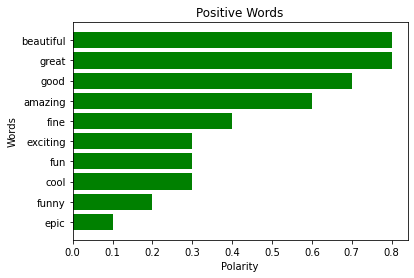

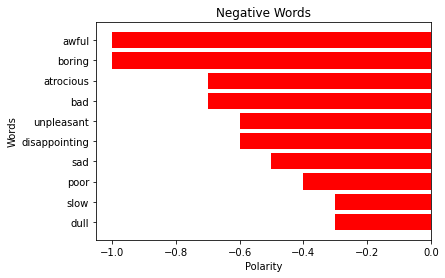

In [ ]:
import matplotlib.pyplot as plt

negative_words = ['epic','funny','cool','fun','exciting','fine','amazing','good','great','beautiful']
polarities = []

for word in negative_words:
  movie_class = Movie_Review(word)
  pol = movie_class.polarity_score()
  polarities.append(round(pol,1))

plt.barh(negative_words,polarities,color='green')
plt.title('Positive Words')
plt.xlabel('Polarity')
plt.ylabel('Words')
plt.show()

negative_words = ['dull','slow','poor','sad','disappointing','unpleasant','bad','atrocious','boring','awful']
polarities = []

for word in negative_words:
  movie_class = Movie_Review(word)
  pol = movie_class.polarity_score()
  polarities.append(round(pol,1))

plt.barh(negative_words,polarities,color='red')
plt.title('Negative Words')
plt.xlabel('Polarity')
plt.ylabel('Words')
plt.show()

In [ ]:
movie_class = Movie_Review("Loved every second of it! Excellent performances! ")
pol = movie_class.polarity_score()
pol

0.5666666666666667

#Project Report 2
Today we worked more on web scraping and spent most of the time trying to automatically click the 'load more reviews' button on the web page so we could access more reviews at once. To do this we imported selenium and chrome driver to click the load more button for us.

In [ ]:
#https://hungpham89.medium.com/a-beginner-guide-for-scraping-data-from-imdb-for-user-reviews-using-selenium-and-beautifulsoup-c60e89a4ad1a
def get_review(url):
  chrome_options = webdriver.ChromeOptions()
  chrome_options.add_argument('--headless')
  chrome_options.add_argument('--no-sandbox')
  chrome_options.add_argument('--disable-dev-shm-usage')
  driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
  #Set the url link and load the webpage
  driver.get(url)

  page = 0
  #We want at least 1000 review, so get 50 at a safe number
  driver.implicitly_wait(1) 
  while page<5:
    try:
        #find the load more button on the webpage
        load_more = driver.find_element(by=By.ID,value='load-more-trigger')
        #click on that button
        load_more.click()
        page+=1
    except:
        #If couldn't find any more button to click, stop
        #print('broke')
        break
   
  #review = driver.find_element_by_class_name('review-container')
  review = driver.find_elements_by_class_name('review-container')
  #Set list for each element:
  title = []
  content = []
  rating = []
  date = []
  user_name = []
  #run for loop to get 
  for n in range(0,200):
      try:
          #Some reviewers only give review text or rating without the other, 
          #so we use try/except here to make sure each block of content must has all the element before append them to the list

          #Check if each review has all the elements
          ftitle = review[n].find_element_by_class_name('title').text
          #For the review content, some of them are hidden as spoiler, 
          #so we use the attribute 'textContent' here after extracting the 'content' tag
          fcontent = review[n].find_element_by_class_name('content').get_attribute("textContent").strip()
          frating = review[n].find_element_by_class_name('rating-other-user-rating').text
          fdate = review[n].find_element_by_class_name('review-date').text
          fname = review[n].find_element_by_class_name('display-name-link').text


          #Then add them to the respective list
          title.append(ftitle)
          content.append(fcontent)
          rating.append(frating)
          date.append(fdate)
          user_name.append(fname)
      except:
          continue
    #Build data dictionary for dataframe
  data = {'User_name': user_name, 
      'Review title': title, 
      'Review Rating': rating,
      'Review date' : date,
      'Review_body' : content
      }
  #Build dataframe for each movie to export
  review = pd.DataFrame(data = data)
  driver.quit()
  return data

#Project Report 3
We were able to finish the web scraping for one movie and add the review and rating to a list. We will create training data with adding more movies to this list.

In [ ]:
movie_links = ['https://www.imdb.com/title/tt1877830/reviews?ref_=tt_ql_3','https://www.imdb.com/title/tt0133093/reviews?ref_=tt_ql_3','https://www.imdb.com/title/tt10872600/reviews?ref_=tt_ql_3','https://www.imdb.com/title/tt1160419/reviews?ref_=tt_ql_3','https://www.imdb.com/title/tt7286456/reviews?ref_=tt_ql_3','https://www.imdb.com/title/tt1375666/reviews?ref_=tt_ql_3','https://www.imdb.com/title/tt0816692/reviews?ref_=tt_ql_3','https://www.imdb.com/title/tt0468569/reviews?ref_=tt_ql_3','https://www.imdb.com/title/tt0068646/reviews?ref_=tt_ql_3','https://www.imdb.com/title/tt0111161/reviews?ref_=tt_ql_3']
rev_rating = []
for link in movie_links:
  review_data = get_review(link)
  contents = review_data['Review_body']
  ratings = review_data['Review Rating']
  titles = review_data['Review title']

  for i in range(len(contents)):
    # print(ratings[i]
    movie_class = Movie_Review(contents[i])
    score = movie_class.polarity_score()
    title_class = Movie_Review(titles[i])
    title_score = title_class.polarity_score()
    # 10 stars = 1 stars
    rat = ratings[i].split('/')[0]
    rev_rating.append([score, int(rat),contents[i],titles[i],title_score])
  
# print(rev_rating)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: use options instead of chrome_options
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: find_elements_by_class_name is deprecated. Please use find_elements(by=By.CLASS_NAME, value=name) instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: DeprecationWarning: find_element_by_class_name is deprecated. Please use find_element(by=By.CLASS_NAME, value=name) instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: DeprecationWarning: find_element_by_class_name is deprecated. Please use find_element(by=By.CLASS_NAME, value=name) instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: DeprecationWarning: find_element_by_class_name is deprecated. Please use find_element(by=By.CLASS_NAME, value=name) instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: DeprecationWarning: find_element_by_class_name is de

In [ ]:
print(len(rev_rating))

1190


In [ ]:
df = pd.DataFrame(rev_rating,columns=['polarity','rating','contents','title','title score'])

adj_scores = []

for i in range(len(df['rating'])):
  if df['title score'][i] != 0.0:
    adj_score = (df['polarity'][i] + df['title score'][i]) / 2.0
  else:
    adj_score = df['polarity'][i]
  adj_scores.append(adj_score)

df['adj score'] = adj_scores

print(df[1075:])
#1078

      polarity  rating                                           contents  \
1075  0.239524      10  I cannot think of a single negative of the God...   
1076  0.151679      10  It could be said that the film-adaptation of M...   
1077  0.346759      10  The Puzo novel is brought to the screen in the...   
1078  0.189035       7  So, the best movie ever? No. Not in my opinion...   
1079  0.308076      10  Why do I want to write the 234th comment on Th...   
...        ...     ...                                                ...   
1185  0.070121       3  Watching this film made me think about the gen...   
1186  0.207460      10  What can I say about this movie that hasn't al...   
1187  0.460000      10  One of the best movies ever made. Simple as th...   
1188  0.261397      10  A film about a Stephen King story? Directed by...   
1189  0.226923      10  The Shawshank Redemption is a well made, engag...   

                                                  title  title score  \
107

112

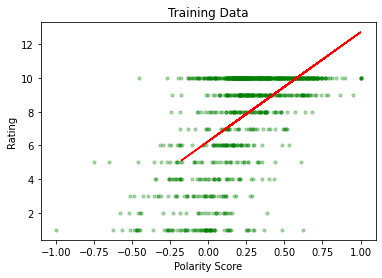

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

X = df['adj score'].to_numpy()
Y = df['rating'].to_numpy()


X = X.reshape((-1,1))
Y = Y.reshape((-1,1))

Xtrain = X[:1077]
Ytrain = Y[:1077]
Xtest = X[1078:]
Ytest = Y[1078:]

model = LinearRegression(fit_intercept=True)
model.fit(Xtrain,Ytrain)
ypred = model.predict(Xtest)

plt.scatter(Xtrain,Ytrain,alpha=.3,s=10,color='green')
plt.xlabel("Polarity Score")
plt.ylabel("Rating")
plt.title('Training Data')
plt.plot(Xtest,ypred,'r')
len(Xtest)

1.7246499819024257


112

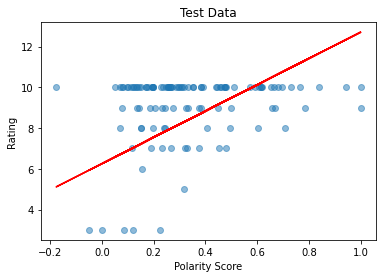

In [ ]:
X = df['adj score'].to_numpy()
Y = df['rating'].to_numpy()


X = X.reshape((-1,1))
Y = Y.reshape((-1,1))

Xtrain = X[:1077]
Ytrain = Y[:1077]
Xtest = X[1078:]
Ytest = Y[1078:]

model = LinearRegression(fit_intercept=True)
model.fit(Xtrain,Ytrain)

xfit = np.arange(X.min(),X.max(),.1)

xfit = xfit.reshape((-1,1))
yfit = model.predict(Xtest)

print(mean_absolute_error(yfit,Ytest))

plt.scatter(Xtest,Ytest,alpha=.5)
plt.xlabel("Polarity Score")
plt.ylabel("Rating")
plt.title('Test Data')
plt.plot(Xtest,yfit,'r')
len(Xtest)

In [ ]:
from sklearn import neighbors
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1, hidden_layer_sizes = (100,100), max_iter=1000,solver='adam')
regr.fit(Xtrain, Ytrain)
ypred = regr.predict(Xtest)

print('MLP: ',mean_absolute_error(ypred,Ytest))

regr = neighbors.KNeighborsRegressor(50, weights='distance')
regr.fit(Xtrain, Ytrain)
ypred = regr.predict(Xtest)

print('KNN: ', mean_absolute_error(ypred,Ytest))


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLP:  1.4267106264959881
KNN:  1.4999467770928423


# Self Evalulation

Overall, our project wound up meeting all of the expectations we created in the beginning. We were able to use web scraping to gather a large dataset of reviews and ratings. We performed sentiment analysis on the text of each review and were able to create a model predicting the rating. 

Areas for improvement could be the sentiment analysis part of the project. The sentiment analysis was not always very accurate especially because it is only analyzing the sentiment of one word at a time, not what the words mean together. We could also improve our model to make better estimations of the rating.